###### Introduction to Network Analysis 2023/24 (xiii)

## Pegs and bands, wiring diagrams vs block models

### II. Wiring diagrams vs block models

You are given six real networks with less than $200$ nodes.

+ Zachary karate club network ([karate_club.net](http://lovro.fri.uni-lj.si/ina/nets/karate_club.net))
+ Davis southern women network ([southern_women.net](http://lovro.fri.uni-lj.si/ina/nets/southern_women.net))
+ Lusseau bottlenose dolphins network ([dolphins.net](http://lovro.fri.uni-lj.si/ina/nets/dolphins.net))
+ US college football network ([american_football.net](http://lovro.fri.uni-lj.si/ina/nets/american_football.net))
+ Slovenian highways network from $2010$ ([highways.net](http://lovro.fri.uni-lj.si/ina/nets/highways.net))
+ Little Rock Lake food web ([foodweb_littlerock.net](http://lovro.fri.uni-lj.si/ina/nets/foodweb_littlerock.net))



1. **(code)** Browse your network library for implementations of network layout algorithms and methods for network visualization. Try to clearly visualize the networks with a wiring diagram produced by different layout algorithms. You can use node sizes to show their centrality and node colors to show network community, core-periphery or other structure.



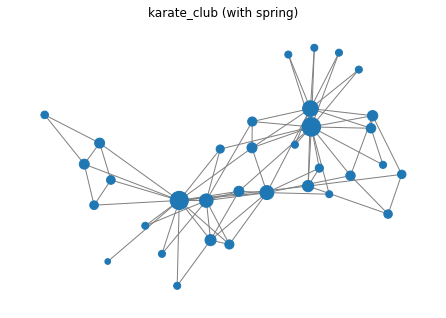

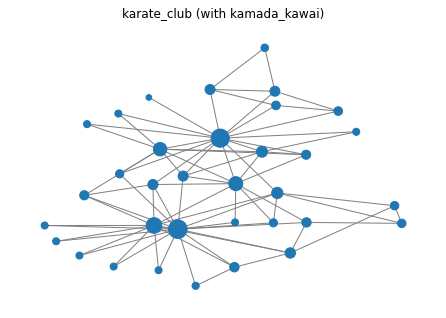

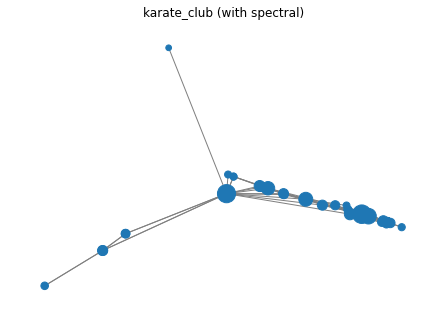

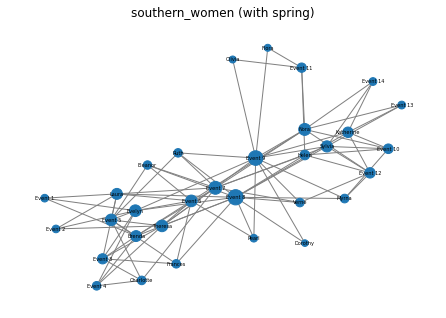

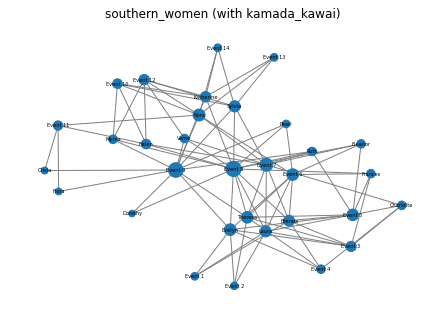

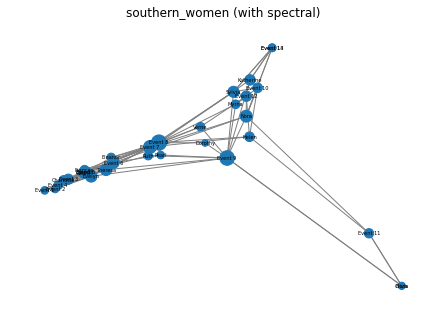

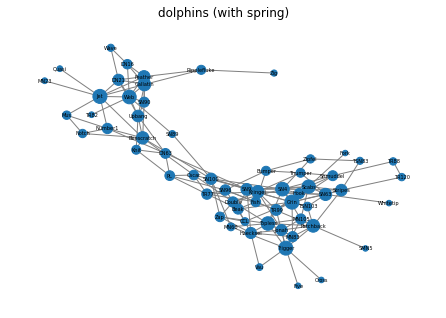

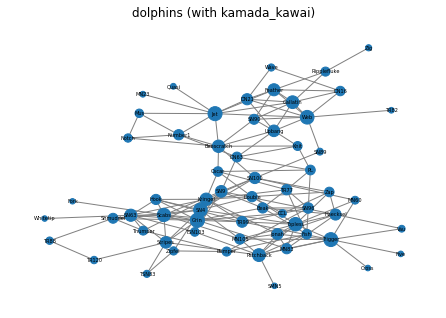

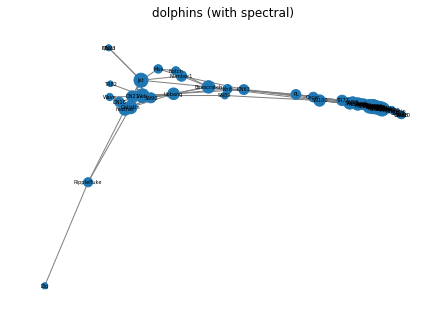

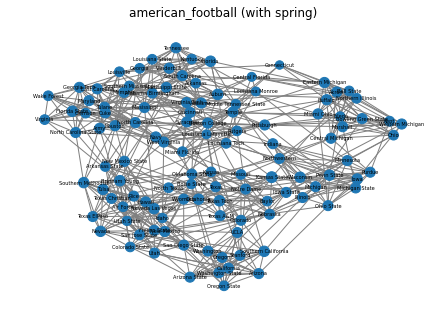

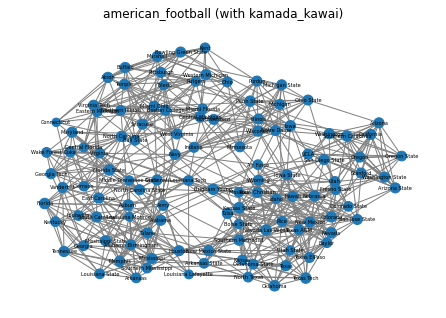

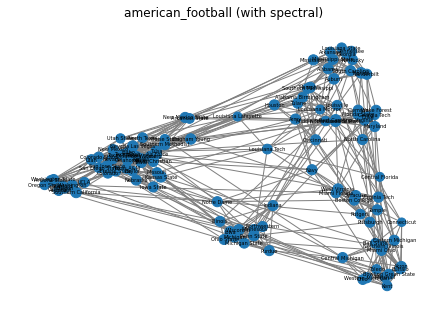

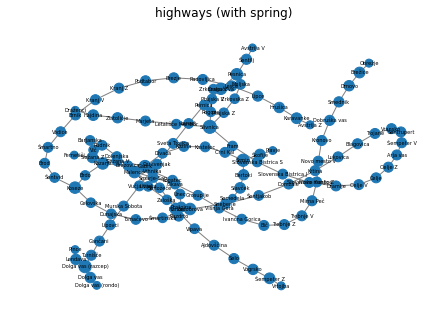

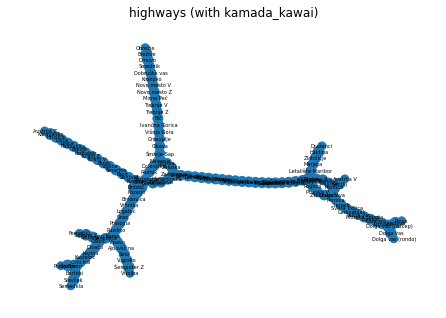

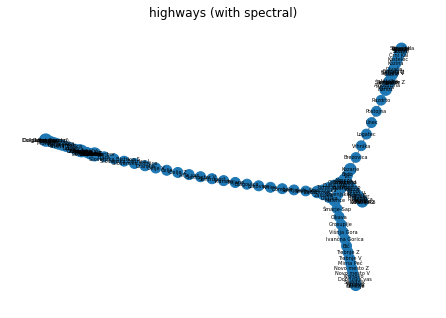

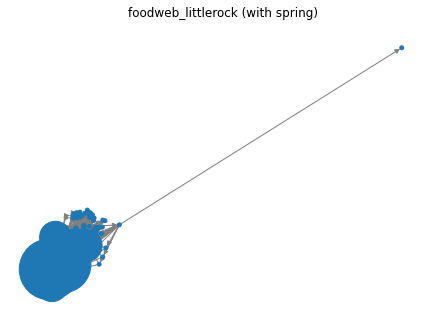

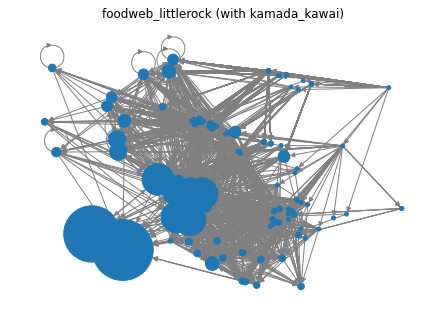

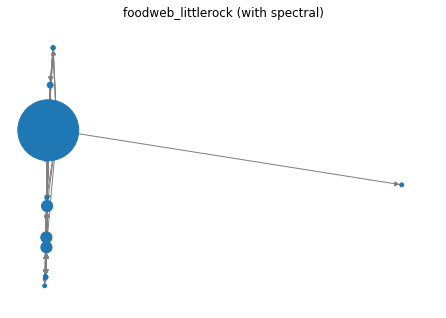

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from cdlib import algorithms
import utils

def plot_wiring_diagram(G, layout=None, C=None, S=None, label="wiring", save_figs=True):
    # If no layout provided, use spring layout by default
    if layout is None:
        layout = nx.spring_layout(G)

    # Define the node colors based on communities
    # if community detection has been applied, each node is colored based on its community
    colors = None
    if C is not None:
        colors = [0] * len(G)
        for c, comm in enumerate(C.communities):
            for i in comm:
                colors[i] = c

    # Define the node sizes based on pagerank
    # if pagerank has been calculated, node size is determined based on its pagerank score
    sizes = None
    if S is not None:
        sizes = [100 * len(G)] * len(G)
        for i in G.nodes():
            sizes[i] *= S[i]

    # Define labels for the nodes
    labels = {i: "" if G.nodes[i]['label'].isdigit() else G.nodes[i]['label'] for i in G.nodes()}

    plt.figure()

    nx.draw(G, pos=layout, node_color=colors, node_size=sizes, labels=labels, font_size=5, edge_color='gray')
    plt.title(f"{G.name} (with {label})")

    if save_figs:
        plt.savefig(G.name + "." + label + ".pdf", bbox_inches='tight')
    else:
        plt.show()
    plt.close()


def metadata_parser(label, value):
    mdata = {"label": label}
    if value is not None and value.isdigit():
        mdata["cluster"] = int(value)
    else:
        mdata["cluster"] = 0

    return mdata


LAYOUTS = {"spring": nx.spring_layout, "kamada_kawai": nx.kamada_kawai_layout, "spectral": nx.spectral_layout}

for name in ["karate_club", "southern_women", "dolphins", "american_football", "highways", "foodweb_littlerock"]:
    G = utils.read_pajek(name, label_parser=metadata_parser)
    # Perform community detection using Infomap algorithm
    # C = algorithms.infomap(G)
    # Compute PageRank of the graph
    S = nx.pagerank(G)

    # For each specified layout, plot the wiring diagram of the graph
    for label, L in LAYOUTS.items():
        # plot_wiring_diagram(G, layout=L(G), C=C, S=S, label=label)
        plot_wiring_diagram(G, layout=L(G), C=None, S=S, label=label, save_figs=False)

2. **(code)** Visualize the networks also with a block model, where you plot the network adjacency matrix with nodes order according to their clustering affiliation (e.g., community structure).

In [ ]:
# Function to plot a block model of a network
def plot_block_model(G, C):
    plt.figure()

    comms = sorted(C.communities, key=len)

    # Create a list of nodes sorted by community
    nodes = [i for c in comms for i in c]
    # Generate adjacency matrix for G
    A = nx.adjacency_matrix(G, nodelist=nodes).todense()
    # Display the adjacency matrix as an image
    plt.imshow(A, cmap='binary', interpolation='nearest')

    # Initialize xy coordinate for block separator
    xy = 0
    for c in comms[:-1]:
        # Increment xy by the size of the current community
        xy += len(c)
        # Draw horizontal and vertical lines separating blocks
        plt.plot([xy - 0.5, xy - 0.5], [-0.5, len(G) - 0.5], '-g')
        plt.plot([-0.5, len(G) - 0.5], [xy - 0.5, xy - 0.5], '-g')

    plt.yticks(range(len(G)), labels=[G.nodes[i]['label'] for i in nodes], size=2)
    plt.xticks([])

    plt.savefig(G.name + ".blocks.pdf", bbox_inches='tight')
    plt.close()


for name in ["karate_club", "southern_women", "dolphins", "american_football", "highways", "foodweb_littlerock"]:
    G = utils.read_pajek(name, label_parser=metadata_parser)
    C = algorithms.infomap(G)
    plot_block_model(G, C)

## Karate club blocks
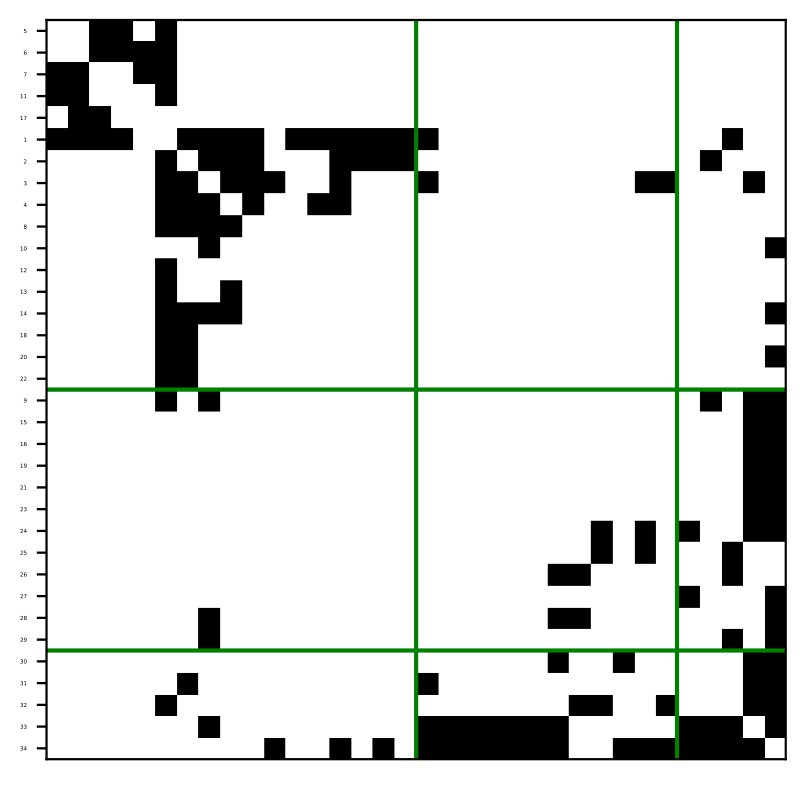

## Southern women blocks
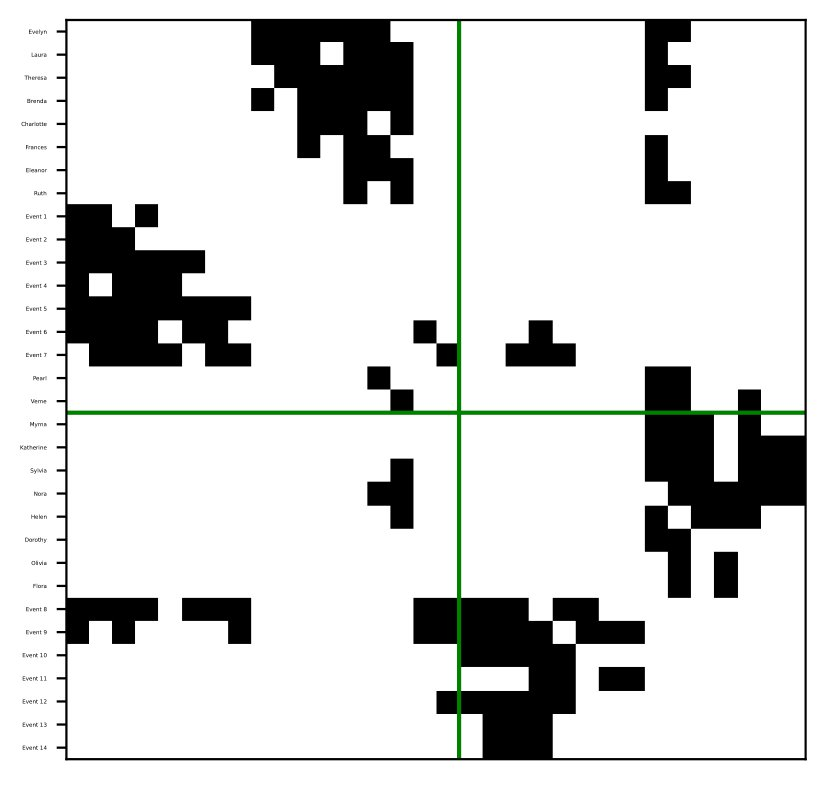

## Dolphins blocks
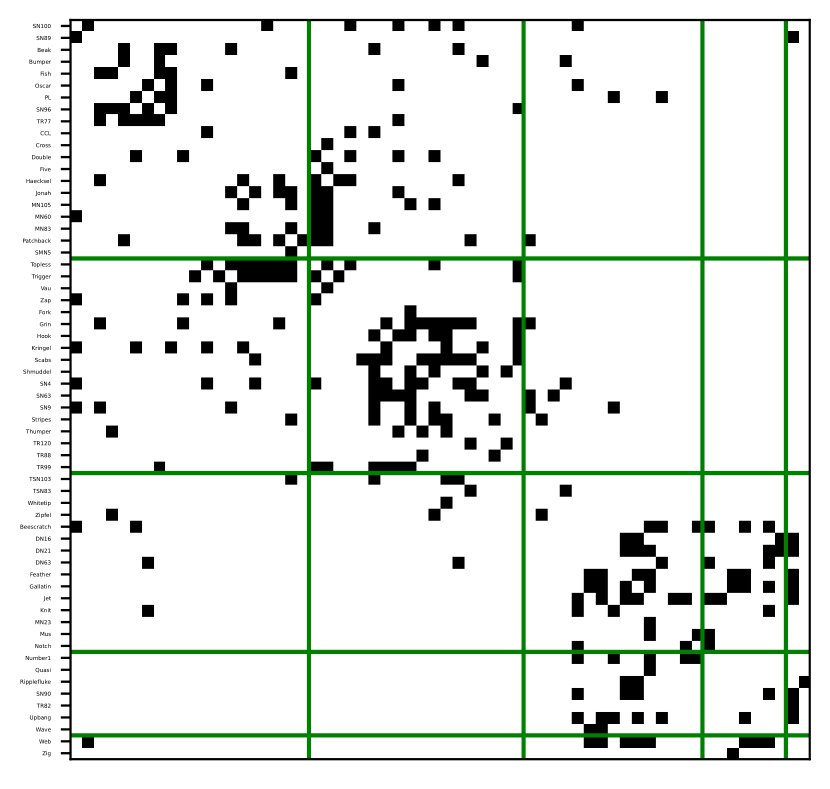

## American football blocks
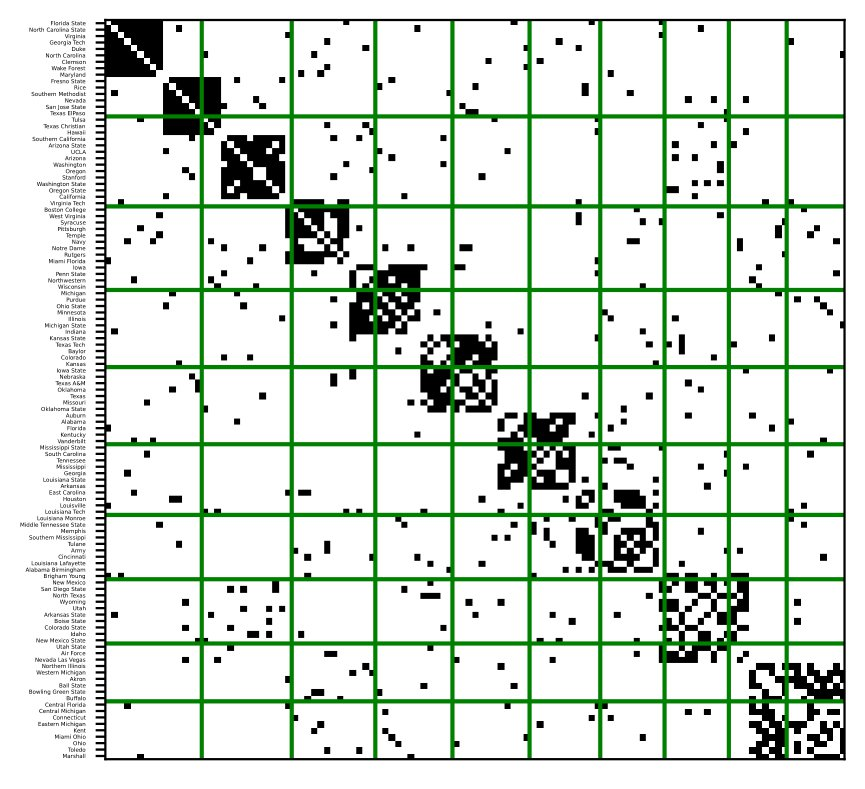

## Highways blocks
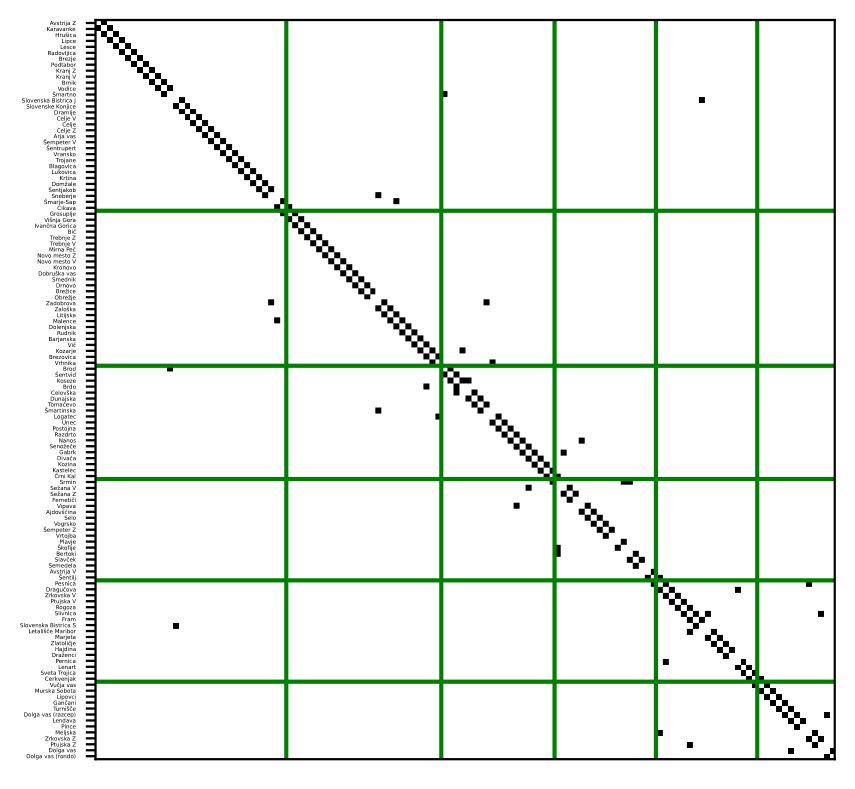

## Foodweb littlerock blocks
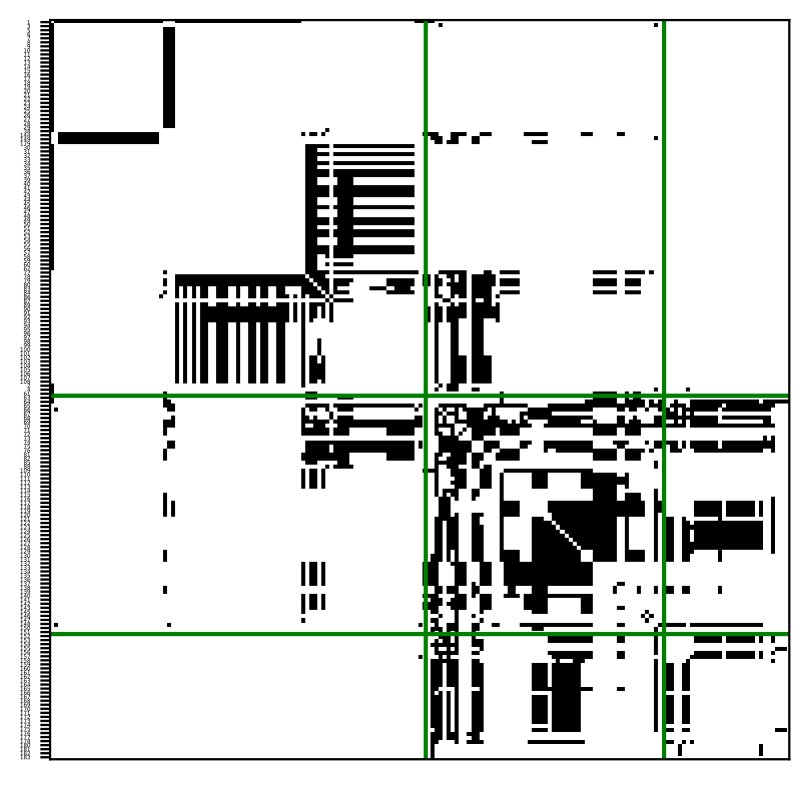